<a href="https://colab.research.google.com/github/violet417/Linear_Algebra_Study/blob/main/%EC%84%A0%ED%98%95%EB%8C%80%EC%88%98_%EC%8A%A4%ED%84%B0%EB%94%94_2%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2장 넘파이(NumPy)로 공부하는 선형대수

### 2.2 벡터와 행렬의 연산

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 벡터와 벡터의 곱셈
# 2차원 배열로 표시한 벡터를 내적했을 때는 결과값이 스칼라가 아닌 2차원 배열
x = np.array([[1], [2], [3]])
y = np.array([[4], [5], [6]])

x.T @ y  # 또는 np.dot(x.T, y)

array([[32]])

In [ ]:
np.dot(x.T, y)

array([[32]])

In [ ]:
# 1차원 배열끼리도 내적
# 넘파이가 앞의 벡터는 행 벡터이고 뒤의 벡터는 열 벡터라고 가정
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

x @ y  # 또는 np.dot(x, y)

32

In [ ]:
np.dot(x, y)

32

#### 연습 문제 2.2.1

A, B, C 세 회사의 주식은 각각 100만원, 80만원, 50만원이다. 이 주식을 각각 3주, 4주, 5주를 매수할 때 필요한 금액을 구하고자 한다.

(1) 주식의 가격과 수량을 각각 $p$ 벡터, $n$ 벡터로 표시하고 넘파이로 코딩한다.

(2) 주식을 매수할 때 필요한 금액을 곱셈으로 표시하고 넘파이 연산으로 그 값을 계산한다.

In [ ]:
p = np.array([[100], [80], [50]])
n = np.array([[3], [4], [5]])

np.dot(p.T, n)

array([[870]])

In [ ]:
# 가중평균
x = np.arange(10)
N = len(x)

np.ones(N) @ x / N

4.5

In [ ]:
x.mean()

4.5

#### 연습 문제 2.2.2

벡터 $x$의 평균 제거 벡터는 다음과 같이 계산함을 증명하라.

$$ 
\begin{align}
x - \dfrac{1}{N}\mathbf{1}_N^Tx \mathbf{1}^{}_N
\tag{2.2.32}
\end{align}
$$

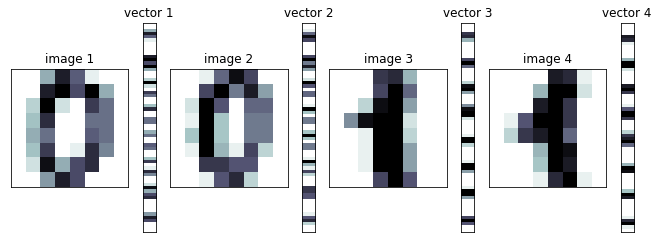

In [ ]:
# 유사도
from sklearn.datasets import load_digits
import matplotlib.gridspec as gridspec

digits = load_digits()
d1 = digits.images[0]
d2 = digits.images[10]
d3 = digits.images[1]
d4 = digits.images[11]
v1 = d1.reshape(64, 1)
v2 = d2.reshape(64, 1)
v3 = d3.reshape(64, 1)
v4 = d4.reshape(64, 1)

plt.figure(figsize=(9, 9))
gs = gridspec.GridSpec(1, 8, height_ratios=[1],
                       width_ratios=[9, 1, 9, 1, 9, 1, 9, 1])
for i in range(4):
    plt.subplot(gs[2 * i])
    plt.imshow(eval("d" + str(i + 1)), aspect=1,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("image {}".format(i + 1))
    plt.subplot(gs[2 * i + 1])
    plt.imshow(eval("v" + str(i + 1)), aspect=0.25,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("vector {}".format(i + 1))
plt.tight_layout()
plt.show()

In [ ]:
# '0'이미지와 '0'이미지, 또는 '1'이미지와 '1'이미지의 내적값
(v1.T @ v2)[0][0], (v3.T @ v4)[0][0]

(3064.0, 3661.0)

In [ ]:
# '0'이미지와 '1'이미지, 또는 '1'이미지와 '0'이미지의 내적값 → 작다
(v1.T @ v3)[0][0], (v1.T @ v4)[0][0], (v2.T @ v3)[0][0], (v2.T @ v4)[0][0]

(1866.0, 1883.0, 2421.0, 2479.0)

#### 연습 문제 2.2.3

다음 코드를 실행하면 MNIST 숫자 이미지 전체 데이터를 모두 벡터로 변환하여 하나의 넘파이 행렬 `X`를 만든다.
이 행렬을 이용하여 다음 문제를 풀어라.
```
from sklearn.datasets import load_digits
X = load_digits().data
```

(1) 내적을 이용하여 첫 번째 이미지와 10번째 이미지의 유사도를 구하라.

(2) 내적을 이용하여 모든 이미지의 조합에 대해 유사도를 구하라. 어떻게 구현하는 것이 효율적일까? (힌트 : 이 문제는 뒤에서 배울 행렬과 행렬의 곱셈을 이용한다.)

In [ ]:
from sklearn.datasets import load_digits
X = load_digits().data

# 첫 번째 이미지와 10번째 이미지의 유사도 계산
similarity = np.dot(X[0], X[9])

print(similarity)

2807.0


In [ ]:
# 모든 이미지의 조합에 대한 유사도 계산
similarity_matrix = np.dot(X, X.T)

print(len(similarity_matrix))
print(similarity_matrix)

1797
[[3070. 1866. 2264. ... 2812. 3006. 2898.]
 [1866. 4209. 3432. ... 3906. 3083. 3307.]
 [2264. 3432. 4388. ... 4005. 3063. 3697.]
 ...
 [2812. 3906. 4005. ... 5092. 3729. 4598.]
 [3006. 3083. 3063. ... 3729. 4316. 3850.]
 [2898. 3307. 3697. ... 4598. 3850. 4938.]]


In [ ]:
# 행렬과 행렬의 곱셈
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 2], [3, 4], [5, 6]])
C = A @ B
C

array([[22, 28],
       [49, 64]])

#### 연습 문제 2.2.4

(1) $A$와 $B$가 위와 같을 때 $AB$를 연습장에 손으로 계산하고 넘파이의 계산 결과와 맞는지 확인한다.


(2) 순서를 바꾸어 $BA$를 손으로 계산하고 넘파이의 계산 결과와 맞는지 확인한다. $BA$가 $AB$와 같은가?

$$
\begin{align}
A = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5& 6 \end{bmatrix}
\end{align}
$$

$$
\begin{align}
B = \begin{bmatrix} 1 & 2 \\ 3 & 4 \\ 5 & 6 \end{bmatrix}
\end{align}
$$

In [ ]:
D = B @ A
D

array([[ 9, 12, 15],
       [19, 26, 33],
       [29, 40, 51]])

(3) $A$, $B$가 다음과 같을 때, $AB$, $BA$를 (계산이 가능하다면) 손으로 계산하고 넘파이의 계산 결과와 맞는지 확인한다. $AB$, $BA$ 모두 계산 가능한가?


$$
\begin{align}
A = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\tag{2.2.45}
\end{align}
$$

$$
\begin{align}
B = \begin{bmatrix} 4 & 7 \\ 5 & 8 \\ 6 & 9 \end{bmatrix}
\tag{2.2.46}
\end{align}
$$

In [ ]:
#1x3, 3x2 계산 불가

(4) $A$, $B$가 다음과 같을 때, $AB$, $BA$를 (계산이 가능하다면) 손으로 계산하고 넘파이의 계산 결과와 맞는지 확인한다. $AB$, $BA$ 모두 계산 가능한가? $BA$의 결과가 $AB$와 같은가?

$$
\begin{align}
A = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}
\tag{2.2.47}
\end{align}
$$

$$
\begin{align}
B = \begin{bmatrix} 5 & 6 \\ 7 & 8 \end{bmatrix}
\tag{2.2.48}
\end{align}
$$


In [ ]:
#2x2, xx2 계산 가능
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
C = A @ B
C

array([[19, 22],
       [43, 50]])

In [ ]:
D = B @ A
D

array([[23, 34],
       [31, 46]])

(5) $A$가 다음과 같을 때, $AA^T$와 $A^TA$를 손으로 계산하고 넘파이의 계산 결과와 맞는지 확인한다. $AA^T$와 $A^TA$의 크기는 어떠한가? 항상 정방행렬이 되는가?

$$
\begin{align}
A = \begin{bmatrix} 1 & 2 \\ 3 & 4 \\ 5 & 6 \end{bmatrix}
\tag{2.2.49}
\end{align}
$$


In [ ]:
A = np.array([[1, 2], [3, 4], [5, 6]])
print(np.dot(A, A.T))
print(np.dot(A.T, A))

[[ 5 11 17]
 [11 25 39]
 [17 39 61]]
[[35 44]
 [44 56]]


In [ ]:
print(A @ A.T)
print(A.T @ A)

[[ 5 11 17]
 [11 25 39]
 [17 39 61]]
[[35 44]
 [44 56]]


(6) $x$가 다음과 같을 때, $x^Tx$와 $xx^T$를 손으로 계산하고 넘파이의 계산 결과와 맞는지 확인한다. $x^Tx$와 $xx^T$의 크기는 어떠한가? 어떤 것이 스칼라이고 어떤 것이 정방행렬인가?

$$
\begin{align}
x = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}
\tag{2.2.50}
\end{align}
$$

In [ ]:
x = np.array([[1], [2], [3]])
print(np.dot(x.T, x))
print(np.dot(x, x.T))

[[14]]
[[1 2 3]
 [2 4 6]
 [3 6 9]]


In [ ]:
# 교환 법칙과 분배 법칙
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
C = np.array([[9, 8], [7, 6]])

In [ ]:
# AB와 BA의 값은 다른 값이 나오므로 교환법칙이 성립하지 않음
print(A @ B, '\n')
print(B @ A)

[[19 22]
 [43 50]] 

[[23 34]
 [31 46]]


In [ ]:
# 분배법칙 성립1
print(A @ (B + C),'\n')
print(A @ B + A @ C)

[[42 42]
 [98 98]] 

[[42 42]
 [98 98]]


In [ ]:
# 분배법칙 성립2
print((A + B) @ C, '\n')
print(A @ C + B @ C)

[[110  96]
 [174 152]] 

[[110  96]
 [174 152]]


In [ ]:
print((A + B).T, '\n')
print(A.T + B.T)

[[ 6 10]
 [ 8 12]] 

[[ 6 10]
 [ 8 12]]


In [ ]:
print((A @ B).T, '\n')
print(B.T @ A.T)

[[19 43]
 [22 50]] 

[[19 43]
 [22 50]]


#### 연습 문제 2.2.5

(1) 길이가 같은 일벡터 $1_N \in \mathbf{R}^N$와 행벡터 $x \in \mathbf{R}^N$의 곱은 행벡터 $x$를 반복하여 가지는 행렬과 같음을 보여라.

$$
\begin{align}
\mathbf{1}_N^{} x^T
=
\begin{bmatrix}
{x}^T \\
{x}^T \\
\vdots    \\
{x}^T \\
\end{bmatrix}
\tag{2.2.62}
\end{align}
$$

(2) 행렬 $X \,( X \in \mathbf{R}^{N \times M})$가 있을 때, 이 행렬의 각 열의 평균으로 이루어진 벡터 $\bar{x}\,( \bar{x} \in \mathbf{R}^{M})$가 다음과 같음을 보여라.

$$ 
\begin{align}
\bar{x} = \dfrac{1}{N} X^T \mathbf{1}_N  
\tag{2.2.63}
\end{align}
$$

(3) 행렬 $\bar{X}\ ( \bar{X} \in \mathbf{R}^{N \times M})$는 동일한 벡터 $\bar{x}^T$를 $N$개 누적하여 만든 행렬이다. 즉 각 열의 모든 값이 그 열의 평균으로 이루어진 행렬이다.

$$
\begin{align}
\bar{X} =
\begin{bmatrix}
\bar{x}^T \\
\bar{x}^T \\
\vdots\\
\bar{x}^T \\
\end{bmatrix}
\tag{2.2.64}
\end{align}
$$

이때 $\bar{X}$가 다음과 같음을 보여라.

$$ 
\begin{align}
\bar{X} = \dfrac{1}{N} \mathbf{1}_N^{} \mathbf{1}_N^T X 
\tag{2.2.65}
\end{align}
$$

(4) 다음 코드를 실행하면 붓꽃 전체 데이터를 모두 벡터로 변환하여 하나의 넘파이 행렬  X 를 만든다. 

```
from sklearn.datasets import load_iris
X = load_iris().data
```
이 데이터로 행렬 $\bar{X}$의 값을 계산하라. 이 행렬은 첫 번째 열의 값이 모두 같은 값으로 붓꽃의 꽃받침의 길이(sepal length)의 평균이고 두 번째 열의 값이 모두 같은 값으로 붓꽃의 꽃받침의 폭(sepal width)의 평균,  이런 식으로 계산된 행렬이다.

In [ ]:
# 항등행렬의 곱셈
A = np.array([[1, 2], [3, 4]])
I = np.eye(2)
A @ I

array([[1., 2.],
       [3., 4.]])

In [ ]:
I @ A

array([[1., 2.],
       [3., 4.]])

#### 연습 문제 2.2.8

벡터 $v_1, v_2, v_3$로 이루어진 행렬 $V$와 벡터 $\lambda$에 대해 다음 식이 성립함을 증명하라. 이 식에서 $\lambda_1$는 스칼라이다.

$$
\begin{align}
V\lambda = 
\begin{bmatrix}
v_1 & v_2 & v_3
\end{bmatrix}
\begin{bmatrix}
\lambda_{1} \\ 0 \\ 0 
\end{bmatrix}
= \lambda_1 v_1 
\tag{2.2.75}
\end{align}
$$

벡터의 선형조합은 다양한 분야에 응용된다. 예를 들어 두 이미지 벡터의 선형조합은 두 이미지를 섞어놓은 모핑(morphing) 효과를 얻는 데 사용할 수 있다.

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


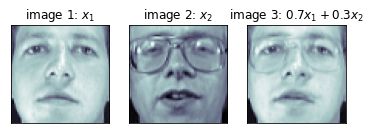

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

f, ax = plt.subplots(1, 3)

ax[0].imshow(faces.images[6], cmap=plt.cm.bone)
ax[0].grid(False)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("image 1: $x_1$")

ax[1].imshow(faces.images[10], cmap=plt.cm.bone)
ax[1].grid(False)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("image 2: $x_2$")

new_face = 0.7 * faces.images[6] + 0.3 * faces.images[10]
ax[2].imshow(new_face, cmap=plt.cm.bone)
ax[2].grid(False)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title("image 3: $0.7x_1 + 0.3x_2$")

plt.show()

#### 연습 문제 2.2.9

$x_1$, $x_2$가 다음과 같을 때,
$$
\begin{align}
x_1 = 
\begin{bmatrix}
x_{11} \\
x_{21} \\
x_{31} \\
\end{bmatrix}
\;\;
x_2 = 
\begin{bmatrix}
x_{12} \\
x_{22} \\
x_{32} \\
\end{bmatrix}
\tag{2.2.78}
\end{align}
$$

다음 등식이 성립함을 보인다.

$$
\begin{align}
Xw =
\begin{bmatrix}
x_1^T \\
x_2^T \\
\end{bmatrix}
\begin{bmatrix}
w_1 \\ w_2 \\ w_3
\end{bmatrix}
=
\begin{bmatrix}
x_1^Tw \\
x_2^Tw \\
\end{bmatrix}
\tag{2.2.79}
\end{align}
$$

In [ ]:
# 이차형식
x = np.array([1, 2, 3])
x

array([1, 2, 3])

In [ ]:
A = np.arange(1, 10).reshape(3, 3)
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
x.T @ A @ x

228

In [ ]:
import numpy as np

In [ ]:
arr1 = [[1, 4], [3, 2], [4, 1]]
arr2 = [[3, 3], [3, 3]]

In [ ]:
a = np.array(arr1)
b = np.array(arr2)

In [ ]:
a@b

array([[15, 15],
       [15, 15],
       [15, 15]])